# Decision Trees (Árboles de decisión)

Un **árbol de decisión** es un modelo de aprendizaje supervisado que aprende una secuencia de reglas del tipo **“si… entonces…”** para **predecir** una variable objetivo a partir de un conjunto de variables explicativas (*features*). Se llama “árbol” porque organiza esas reglas como una estructura jerárquica: se inicia en una **raíz** (root), se realizan preguntas sobre los datos en **nodos internos** (splits), y se llega a una **hoja** (leaf) donde se produce la predicción final.

---

## ¿Para qué se usan?
Los árboles de decisión se usan tanto en:

- **Clasificación**: la salida es una clase (por ejemplo, *admitido/no admitido*, *fraude/no fraude*).
- **Regresión**: la salida es un número continuo (por ejemplo, *precio*, *demanda*, *peso*).

Su principal atractivo es que son **interpretables**: cada camino desde la raíz hasta una hoja puede leerse como una regla clara que describe por qué el modelo toma una decisión.

---

## ¿Qué “hace” un árbol en el entrenamiento?
Durante el entrenamiento, el árbol busca **partir el espacio de variables** en regiones cada vez más homogéneas. En cada nodo interno, el árbol decide:

1. **Qué variable** usar para dividir (por ejemplo, `gpa`).
2. **Qué umbral** o criterio usar (por ejemplo, `gpa ≤ 3.2`).

Con esa división se crean dos ramas (izquierda/derecha) y el proceso se repite recursivamente hasta cumplir un criterio de parada (profundidad máxima, mínimo de muestras por hoja, etc.).

---

## ¿Cómo decide “la mejor” división?
El objetivo del árbol es que después del split, cada grupo sea lo más “puro” posible.

### En clasificación
Busca reducir la mezcla de clases usando medidas de impureza como:

- **Gini**:
$$
G = 1 - \sum_{k} p_k^2
$$
- **Entropía**:
$$
H = -\sum_{k} p_k \log(p_k)
$$

El árbol elige el split que **más reduce** la impureza (mayor *information gain* o reducción de Gini).

### En regresión
Busca que las salidas dentro de cada nodo tengan poca dispersión. Típicamente minimiza el **MSE** (varianza) dentro de los nodos:
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2
$$
y elige el split que más reduce ese error.

---

## ¿Cómo produce la predicción?
- **En clasificación**: la predicción en una hoja suele ser la **clase mayoritaria**. Además, se puede reportar una **probabilidad** basada en la proporción de clases en la hoja (por ejemplo, 8 de 10 son “1” ⇒ probabilidad ≈ 0.8).
- **En regresión**: la predicción en una hoja suele ser el **promedio** (o mediana) de los valores $y$ de los puntos que cayeron en esa hoja.

---

## Ventajas y desventajas (idea general)
**Ventajas**
- Muy interpretables (reglas claras).
- Capturan relaciones no lineales y efectos de interacción sin ingeniería avanzada.
- Requieren poco preprocesamiento (no necesitan escalado).

**Desventajas**
- Pueden **sobreajustar** si crecen demasiado (alta varianza).
- Pequeños cambios en los datos pueden cambiar la estructura del árbol.
- Su rendimiento suele mejorar usando **ensambles** (Random Forest, Gradient Boosting).

---

## Buenas prácticas para usarlos
- Controlar complejidad: `max_depth`, `min_samples_leaf`, `min_samples_split`.
- Evaluar con *train/test* o *cross-validation* (evitar *data leakage*).
- Comparar contra un baseline (especialmente en datasets pequeños).
- Si el árbol es inestable o sobreajusta, considerar **Random Forest** o **Gradient Boosting**.

---


# **1) Árbol de decisión para regresión (Head/Brain)**

=== Decision Tree Regressor ===
RMSE test: 84.280
RMSE train: 63.891
R^2  test: 0.545
R^2  train: 0.707


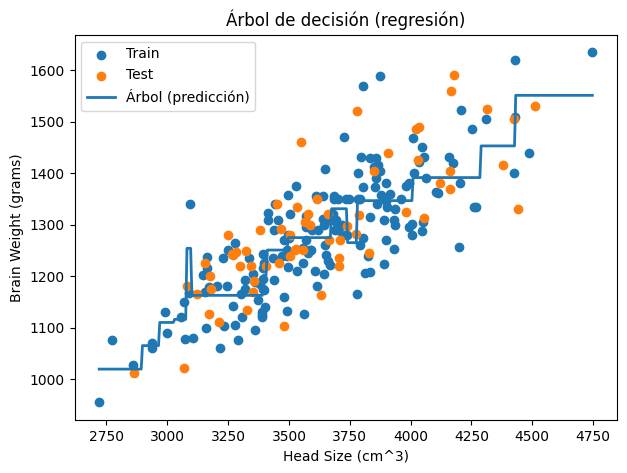

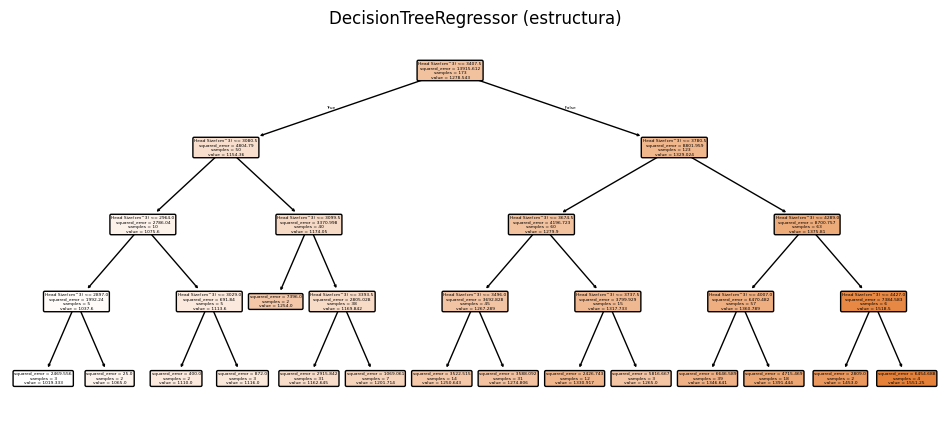

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
df1 = pd.read_csv("https://media.geeksforgeeks.org/wp-content/cdn-uploads/20220522225116/headbrain11.csv")

X = df1[["Head Size(cm^3)"]]          # feature
y = df1["Brain Weight(grams)"]        # target continua

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.27, random_state=8)

# Árbol de regresión (controla overfitting con max_depth / min_samples_leaf)
reg_tree = DecisionTreeRegressor(
    max_depth=4, # maximo profundidad del árbol
    min_samples_leaf=2,# minimo muestras por hoja
    random_state=8
)
reg_tree.fit(Xtr, ytr)

yhat_te = reg_tree.predict(Xte)
yhay_tr = reg_tree.predict(Xtr)

print("=== Decision Tree Regressor ===")
print(f"RMSE test: {np.sqrt(mean_squared_error(yte, yhat_te)):.3f}")
print(f"RMSE train: {np.sqrt(mean_squared_error(ytr, yhay_tr)):.3f}")
print(f"R^2  test: {r2_score(yte, yhat_te):.3f}")
print(f"R^2  train: {r2_score(ytr, yhay_tr):.3f}")

# Curva/ajuste en 1D
x_grid = np.linspace(X["Head Size(cm^3)"].min(), X["Head Size(cm^3)"].max(), 400)
y_grid = reg_tree.predict(pd.DataFrame({"Head Size(cm^3)": x_grid}))

plt.figure(figsize=(7,5))
plt.scatter(Xtr["Head Size(cm^3)"], ytr, label="Train")
plt.scatter(Xte["Head Size(cm^3)"], yte, label="Test")
plt.plot(x_grid, y_grid, linewidth=2, label="Árbol (predicción)")
plt.xlabel("Head Size (cm^3)")
plt.ylabel("Brain Weight (grams)")
plt.title("Árbol de decisión (regresión)")
plt.legend()

plt.show()

# Visualizar el árbol
plt.figure(figsize=(12,5))
plot_tree(reg_tree, feature_names=["Head Size(cm^3)"], filled=True, rounded=True)
plt.title("DecisionTreeRegressor (estructura)")
plt.show()


# **2) Árbol de decisión para tu dataset de ingresos/admisión...**

## **A) Decision Tree Classifier (recomendado)**

=== Decision Tree Classifier ===
Accuracy: 0.889
ROC-AUC : 0.900
Matriz de confusión:
[[4 0]
 [1 4]]

Reporte:
              precision    recall  f1-score   support

           0      0.800     1.000     0.889         4
           1      1.000     0.800     0.889         5

    accuracy                          0.889         9
   macro avg      0.900     0.900     0.889         9
weighted avg      0.911     0.889     0.889         9



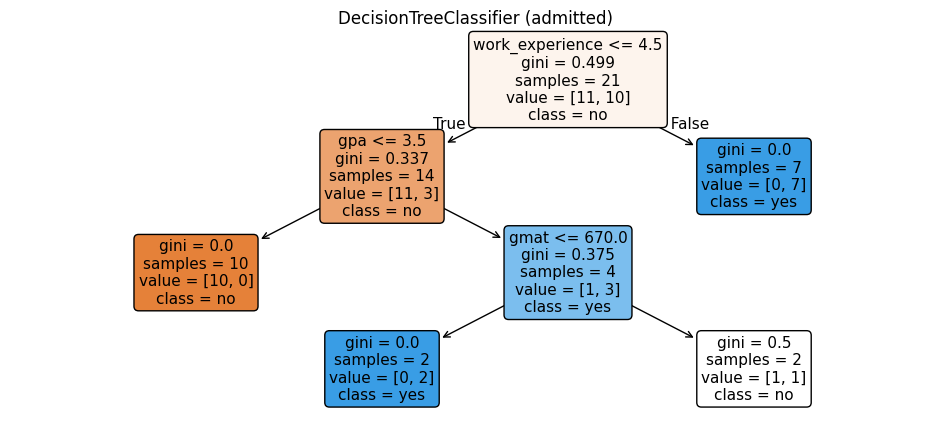


Importancia de variables:
work_experience    0.608040
gpa                0.339196
gmat               0.052764
dtype: float64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# 1) Cargar datos
url = "https://media.geeksforgeeks.org/wp-content/uploads/20251025141423714536/logit_train1.csv"
df = pd.read_csv(url)

# Nota: el CSV tiene una primera columna sin nombre (índice). La eliminamos.
df = df.drop(columns=[df.columns[0]])

X = df[["gmat", "gpa", "work_experience"]]
y = df["admitted"].astype(int)

# 2) Train/test
Xtr, Xte, ytr, yte = train_test_split(
    X, y, test_size=0.30, random_state=7, stratify=y
)

# 3) Modelo (controla el overfitting con max_depth/min_samples_leaf)
clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=2,
    random_state=7
)
clf.fit(Xtr, ytr)

# 4) Predicción y métricas
proba = clf.predict_proba(Xte)[:, 1]
pred = (proba >= 0.5).astype(int)

print("=== Decision Tree Classifier ===")
print(f"Accuracy: {accuracy_score(yte, pred):.3f}")
print(f"ROC-AUC : {roc_auc_score(yte, proba):.3f}")
print("Matriz de confusión:")
print(confusion_matrix(yte, pred))
print("\nReporte:")
print(classification_report(yte, pred, digits=3))

# 5) Visualizar el árbol
plt.figure(figsize=(12,5))
plot_tree(
    clf,
    feature_names=["gmat", "gpa", "work_experience"],
    class_names=["no", "yes"],
    filled=True,
    rounded=True
)
plt.title("DecisionTreeClassifier (admitted)")
plt.show()

# 6) Importancia de variables
imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables:")
print(imp)


## **B) Decision Tree Regressor (alternativo; útil para comparar)**
Aunque admitted es binaria, un árbol de regresión te devuelve valores continuos (que suelen interpretarse como “score” o probabilidad aproximada).

=== Decision Tree Regressor (sobre admitted) ===
RMSE score vs y: 0.373
Matriz de confusión (umbral 0.5):
[[4 0]
 [1 4]]


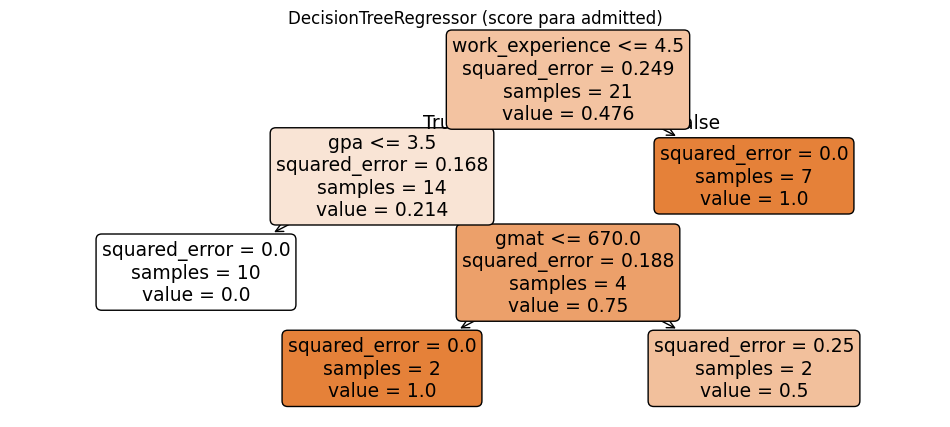

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

url = "https://media.geeksforgeeks.org/wp-content/uploads/20251025141423714536/logit_train1.csv"
df = pd.read_csv(url)
df = df.drop(columns=[df.columns[0]])

X = df[["gmat", "gpa", "work_experience"]]
y = df["admitted"].astype(float)

Xtr, Xte, ytr, yte = train_test_split(
    X, y, test_size=0.30, random_state=7, stratify=df["admitted"]
)

reg = DecisionTreeRegressor(
    max_depth=3,
    min_samples_leaf=2,
    random_state=7
)
reg.fit(Xtr, ytr)

score = reg.predict(Xte)                 # valores continuos
pred = (score >= 0.5).astype(int)        # si quieres clasificar con umbral

print("=== Decision Tree Regressor (sobre admitted) ===")
print(f"RMSE score vs y: {np.sqrt(mean_squared_error(yte, score)):.3f}")
print("Matriz de confusión (umbral 0.5):")
print(confusion_matrix(yte.astype(int), pred))

plt.figure(figsize=(12,5))
plot_tree(reg, feature_names=["gmat", "gpa", "work_experience"], filled=True, rounded=True)
plt.title("DecisionTreeRegressor (score para admitted)")
plt.show()
